In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Load dataset
df = pd.read_csv('dataset_mood_smartphone.csv',
                 parse_dates=['time'])

# Filter only the mood rows & rename for convenience
df = df[df['variable']=='mood'] \
       .rename(columns={'time':'timestamp',
                        'value':'mood'})

# Now df has columns ['','id','timestamp','variable','mood']
# and you can drop the unused 'variable' column:
df = df.drop(columns=['variable'])

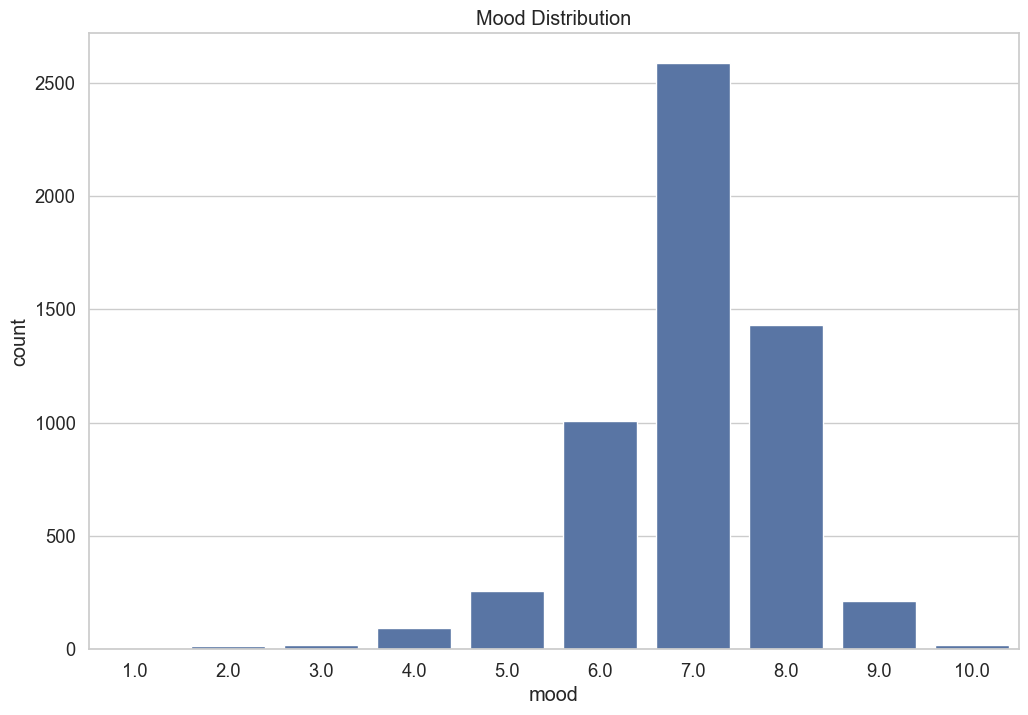

In [44]:
# Mood distribution
sns.countplot(x='mood', data=df)
plt.title('Mood Distribution')
plt.savefig('mood_distribution.pdf')
plt.show()


C:\Users\Lucas\AppData\Local\Temp\ipykernel_22752\106098760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


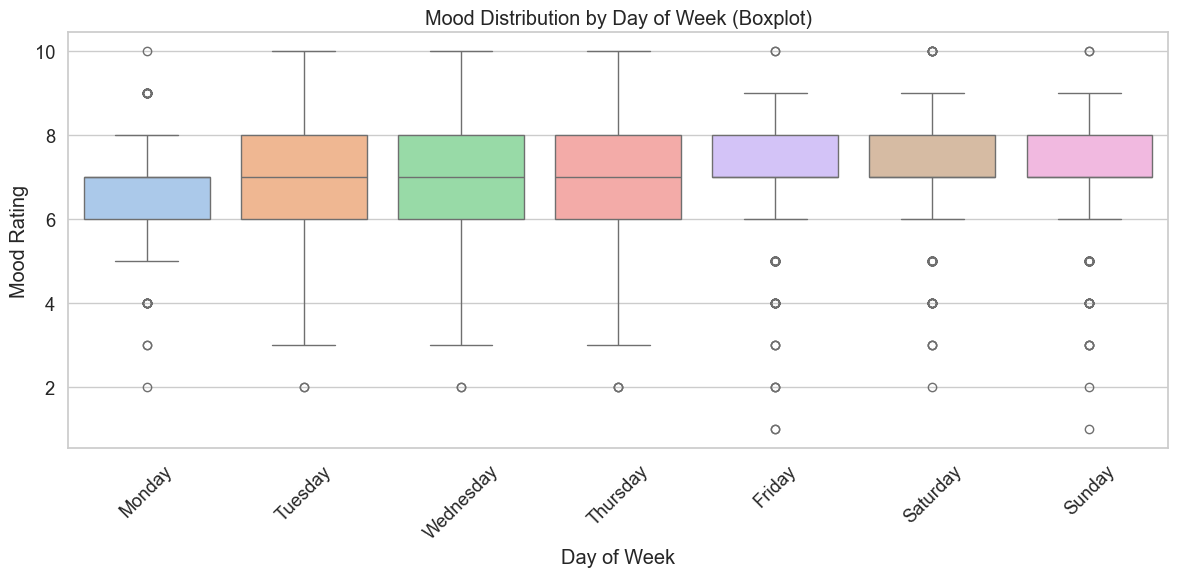

In [50]:
# Mood boxplot by weekday
df['weekday'] = df['timestamp'].dt.day_name()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(12,6))
sns.boxplot(
    x='weekday',
    y='mood',
    data=df,
    order=order,
    palette='pastel'
)
plt.title('Mood Distribution by Day of Week (Boxplot)')
plt.xlabel('Day of Week')
plt.ylabel('Mood Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('mood_by_weekday_boxplot.pdf')
plt.show()